<a href="https://colab.research.google.com/github/akinoriosamura/pytorch-sample/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optimizers
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib
# matplotlib.use('Age')
import matplotlib.pyplot as plt

In [0]:
class Autoencoder(nn.Module):
  def __init__(self, device='cpu'):
    super().__init__()
    self.device =device
    self.l1 = nn.Linear(784, 200)
    self.l2 = nn.Linear(200, 784)
  
  def forward(self, x):
    h = self.l1(x)
    h = torch.relu(h)
    
    h = self.l2(h)
    y = torch.sigmoid(h)
    
    return y

In [23]:
if __name__ == '__main__':
  np.random.seed(1234)
  torch.manual_seed(1234)
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  """
  1, load data
  """
  root = os.path.join('./', 'data', 'fashion_mnist')
  # view(-1)で一次元tensorに変換
  transform = transforms.Compose([transforms.ToTensor(), lambda x: x.view(-1)])
  mnist_train = torchvision.datasets.FashionMNIST(
      root=root, download=True, train=True, transform=transform
  )
  mnist_test = torchvision.datasets.FashionMNIST(
      root=root, download=True, train=False, transform=transform
  )
  train_dataloader = DataLoader(mnist_train, batch_size=100, shuffle=True)
  test_dataloader = DataLoader(mnist_test, batch_size=1, shuffle=False)
  
  """
  2,build model
  """
  model = Autoencoder(device=device).to(device)
  """
  3, train model
  """
  criterion = nn.BCELoss()
  optimizer = optimizers.Adam(model.parameters())
  
  def compute_loss(x, preds):
    return criterion(preds, x)
  
  def train_step(x):
    # set train mode
    model.train()
    preds = model(x)
    loss = compute_loss(x, preds)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss
  
  epochs = 10
  
  for epoch in range(epochs):
    train_loss = 0
    
    for (x, _) in train_dataloader:
      x = x.to(device)
      loss = train_step(x)
      
      train_loss += loss.item()
    
    train_loss /= len(train_dataloader)
    
    print('Epoch: {}, Cost: {:.3f}'.format(epoch+1, train_loss))

Epoch: 1, Cost: 0.327
Epoch: 2, Cost: 0.280
Epoch: 3, Cost: 0.271
Epoch: 4, Cost: 0.267
Epoch: 5, Cost: 0.265
Epoch: 6, Cost: 0.263
Epoch: 7, Cost: 0.262
Epoch: 8, Cost: 0.261
Epoch: 9, Cost: 0.260
Epoch: 10, Cost: 0.260


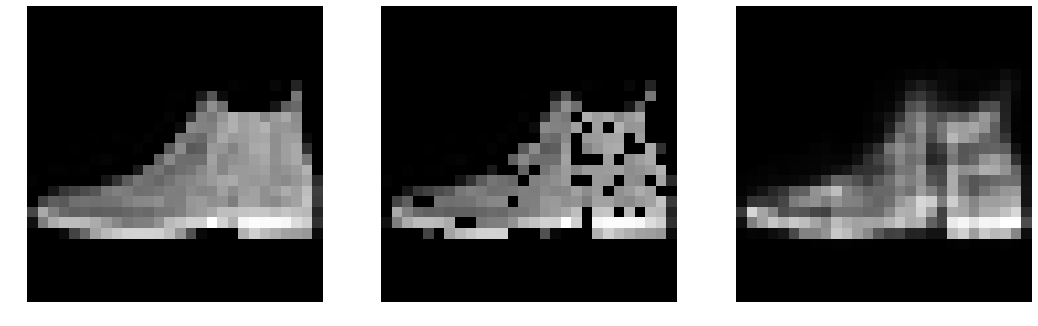

In [25]:
"""
4, test model
"""
x, _ = next(iter(test_dataloader))
noise = torch.bernoulli(0.8 * torch.ones(x.size())).to(device)
x_noise = x * noise

x_reconstructed = model(x_noise)

plt.figure(figsize=(18, 6))
for i, image in enumerate([x, x_noise, x_reconstructed]):
  image = image.view(28, 28).detach().cpu().numpy()
  plt.subplot(1, 3, i+1)
  plt.imshow(image, cmap='binary_r')
  plt.axis('off')
plt.show()